In [1]:
#Ice cream reviews dataset
#Kaggle link to the dataset : https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset
#(used the csv files in the 'bj' directory)
#Github link to the notebook: https://github.com/Deepa17/Reviews_EDA/

## Import Libraries

In [2]:
!pip install wordcloud

In [3]:
#import libraries
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Data Wrangling

In [4]:
#import reviews and products 
products = pd.read_csv('/kaggle/input/ice-cream-dataset/bj/products.csv')
reviews = pd.read_csv('/kaggle/input/ice-cream-dataset/bj/reviews.csv')

In [5]:
#get dataset information
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           57 non-null     object 
 1   name          57 non-null     object 
 2   subhead       57 non-null     object 
 3   description   57 non-null     object 
 4   rating        57 non-null     float64
 5   rating_count  57 non-null     int64  
 6   ingredients   57 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.2+ KB


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   key          7943 non-null   object
 1   author       7659 non-null   object
 2   date         7943 non-null   object
 3   stars        7943 non-null   int64 
 4   title        5332 non-null   object
 5   helpful_yes  7943 non-null   int64 
 6   helpful_no   7943 non-null   int64 
 7   text         7943 non-null   object
dtypes: int64(3), object(5)
memory usage: 496.6+ KB


In [7]:
#Merge the products and the reviews based on the column 'key'
data = pd.merge(products,reviews, how='inner', on=['key'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           7943 non-null   object 
 1   name          7943 non-null   object 
 2   subhead       7943 non-null   object 
 3   description   7943 non-null   object 
 4   rating        7943 non-null   float64
 5   rating_count  7943 non-null   int64  
 6   ingredients   7943 non-null   object 
 7   author        7659 non-null   object 
 8   date          7943 non-null   object 
 9   stars         7943 non-null   int64  
 10  title         5332 non-null   object 
 11  helpful_yes   7943 non-null   int64  
 12  helpful_no    7943 non-null   int64  
 13  text          7943 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 868.9+ KB


In [9]:
#drop duplicate rows
data.drop_duplicates()

,key,name,subhead,description,rating,rating_count,ingredients,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,Chocolate & Peanut Butter Ice Creams with Mini...,Find your way to the ultimate ice cream experi...,4.7,19,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Peanut Butter Fudge Core,Chocolate & Peanut Butter Ice Creams with Mini...,Find your way to the ultimate ice cream experi...,4.7,19,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream I’ve tri...
7940,56_bj,Peanut Butter Fudge Core,Chocolate & Peanut Butter Ice Creams with Mini...,Find your way to the ultimate ice cream experi...,4.7,19,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,Peanut Butter Fudge Core,Chocolate & Peanut Butter Ice Creams with Mini...,Find your way to the ultimate ice cream experi...,4.7,19,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


In [10]:
#convert the datetime column from obj to datetime type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [11]:
#Check the datatypes after conversion
data.dtypes

key                     object
name                    object
subhead                 object
description             object
rating                 float64
rating_count             int64
ingredients             object
author                  object
date            datetime64[ns]
stars                    int64
title                   object
helpful_yes              int64
helpful_no               int64
text                    object
dtype: object

In [12]:
#Fill the missing values in object columns with "UNKNOWN"
cols = ['title', 'author']
for column in cols:
    data[column] = data[column].fillna('UNKNOWN')

In [13]:
#check if all the missing values are replaced
data.isnull().sum()

key             0
name            0
subhead         0
description     0
rating          0
rating_count    0
ingredients     0
author          0
date            0
stars           0
title           0
helpful_yes     0
helpful_no      0
text            0
dtype: int64

In [14]:
#get all object datatype columns and convert them to lowercase
obj_cols = list(data.select_dtypes(include=[object]))
print(obj_cols)

['key', 'name', 'subhead', 'description', 'ingredients', 'author', 'title', 'text']


In [15]:
#exclude the column 'key'
for col in obj_cols[1:]:
    data[col] = data[col].str.lower()

In [16]:
#Function to clean to remove stopwords and apply stemming in the columns 'title' and 'text'
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) 
#convert to lowercase and remove stopwords
def handle_text(column):
    new_values = []
    
    for sentence in data[column]:
        filtered_sentence=[]
        stemmed_words = []
        tokens = word_tokenize(sentence)
        filtered_sentence = [w for w in tokens if not w in stop_words]
        stemmed_words = [ps.stem(w) for w in filtered_sentence]
        new_values.append(' '.join(stemmed_words))
    
    data[column] = new_values

In [17]:
columns = ['title','text']
for i in columns:
    handle_text(i)

## Data Visualization

**Plot top 10 products with stars > 4**

In [18]:
top_products = data[data['rating'] > 4].groupby('key')['stars'].count().nlargest(10).reset_index()

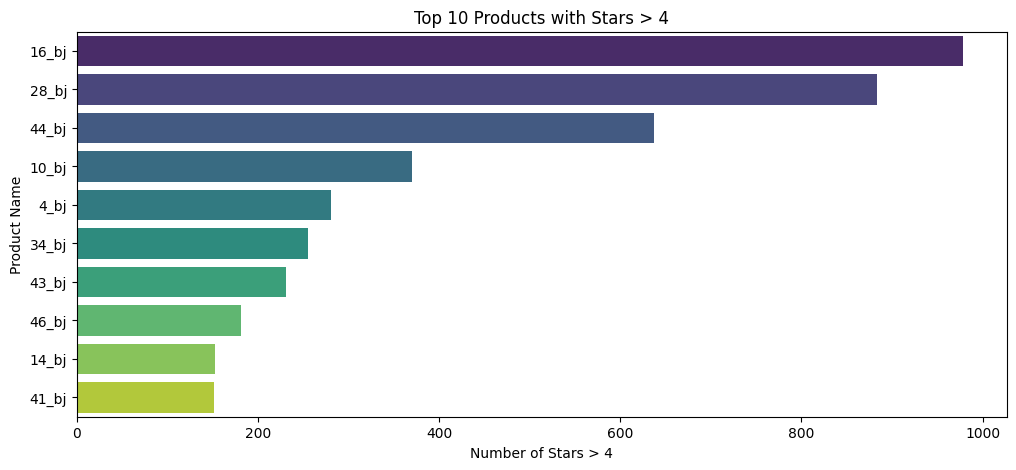

In [19]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x='stars', y='key', palette='viridis')
plt.xlabel('Number of Stars > 4')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Stars > 4')
plt.show()

**Wordcloud of reviews of any product**

In [20]:
def generate_word_cloud(data, product_id):
    try:
        product_id = product_id.lower()
        product_reviews = data[data['key'] == product_id]['text'] 
        all_reviews_text = ' '.join(product_reviews) #join all the reviews 
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Product ID {product_id}')
        plt.show()
        
    except Exception as e:
        print("Please check the product id")

Enter the product ID:  40_bj


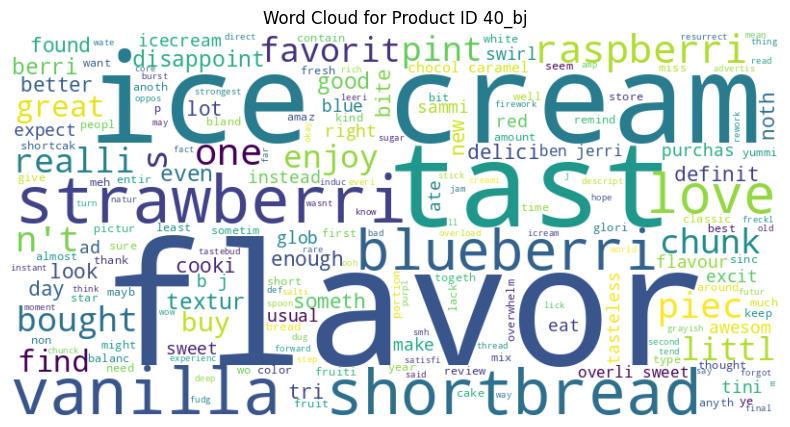

In [21]:
# Get the product ID from the user
user_product_id = input('Enter the product ID: ')

# Call the function to generate the word cloud for the specified product ID
generate_word_cloud(data, user_product_id)

In [22]:
# Enter invalid id
user_product_id = input('Enter the product ID: ')

# Call the function to generate the word cloud for the specified product ID
generate_word_cloud(data, user_product_id)

Enter the product ID:  invalid


Please check the product id
